<a href="https://colab.research.google.com/github/marcustux1/DIO/blob/main/PROJETOS/PANDAS/Combust%C3%ADveis_GO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Preços Máximo, Mínimo e Médio (Gasolina, Etanol, Gasolina Aditivada) registrados em Julho de 2021.

Estado de análise Goiás.

##Fonte: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv

# Importar as Bibliotecas


In [1]:
#Importando as Bibliotecas

import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use("seaborn")


# Registro do preço Venda Etanol, Gasolina Comum e Gasolina Aditivada - Julho/2021

> Preços semanais de venda de combustível, especificando valor de compra, de venda, unidade de medida (R$/litro), para revenda e bandeira



In [54]:
# Carregando o arquivo OfertasLicitacoes_202107.csv e criando o DataFrame
## url = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
# Será carregado o arquivo csv diretamente do meu github para garantir que futuramente o arquivo esteja disponível.
url = 'https://raw.githubusercontent.com/marcustux1/DIO/main/PROJETOS/PANDAS/2021-07-gasolina-etanol.csv'
df = pd.read_csv(url,sep=';')

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.



In [3]:
# Visualizar as 5 primeiras linhas
df.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,ETANOL,01/07/2021,"4,99",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [4]:
# Quantidade de Linhas e Colunas
df.shape

(47849, 16)

# Tratando os dados
Muitos dados encontrados na internet necessitam de formatação e limpeza/tratamento para melhor entendimento.

In [5]:
# Verificando os tipos de dados
df.dtypes

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [6]:
# Transformando as colunas Valor de Venda em Float (alterando "," para ".") e Data da Coleta para Datetime
df['Valor de Venda'] = df['Valor de Venda'].apply(lambda x: float(x.replace(",",".")))
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'])

In [7]:
# Verificar a transformação
df.dtypes

Região - Sigla               object
Estado - Sigla               object
Município                    object
Revenda                      object
CNPJ da Revenda              object
Nome da Rua                  object
Número Rua                   object
Complemento                  object
Bairro                       object
Cep                          object
Produto                      object
Data da Coleta       datetime64[ns]
Valor de Venda              float64
Valor de Compra             float64
Unidade de Medida            object
Bandeira                     object
dtype: object

In [8]:
# Verificando os valores informados na coluna Valor de Venda, e possue apenas dados ausentes
df.isnull().sum()

Região - Sigla           0
Estado - Sigla           0
Município                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Número Rua              34
Complemento          38190
Bairro                 135
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      47849
Unidade de Medida        0
Bandeira                 0
dtype: int64

In [9]:
pd.options.display.float_format = '{:20,.2f}'.format

In [10]:
# Calculando a média do Valor de Venda (ALCOOL, GASOLINA, GASOLINA ADITIVADA) para o Brasil Julho 2021

df.groupby('Produto')['Valor de Venda'].mean().sort_values(ascending=False)

Produto
GASOLINA ADITIVADA                   5.94
GASOLINA                             5.80
ETANOL                               4.59
Name: Valor de Venda, dtype: float64



---



# Análise do preço do Etanol Brasil Julho 2021
Abaixo valores e gráfico de Preço máximo, mínimo e média encontrados em Julho de 2021 no Brasil.

In [11]:
etanol_Brasil = df.loc[df['Produto'] == 'ETANOL']
gasolina_Brasil = df.loc[df['Produto'] == 'GASOLINA']
gasolina_ad_Brasil = df.loc[df['Produto'] == 'GASOLINA ADITIVADA']

In [12]:
# Valor Máximo Etanol em Julho 2021 Brasil
etanol_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].max().sort_values(ascending=False)

Estado - Sigla
RS                   7.00
RJ                   6.80
AC                   6.54
PA                   6.14
DF                   6.00
PE                   5.99
TO                   5.95
AL                   5.88
CE                   5.80
RO                   5.79
SC                   5.75
RN                   5.75
ES                   5.67
PI                   5.60
SP                   5.60
AP                   5.54
BA                   5.52
PR                   5.50
PB                   5.47
MA                   5.40
MG                   5.36
SE                   5.34
MS                   5.19
RR                   5.06
GO                   4.99
AM                   4.99
MT                   4.75
Name: Valor de Venda, dtype: float64

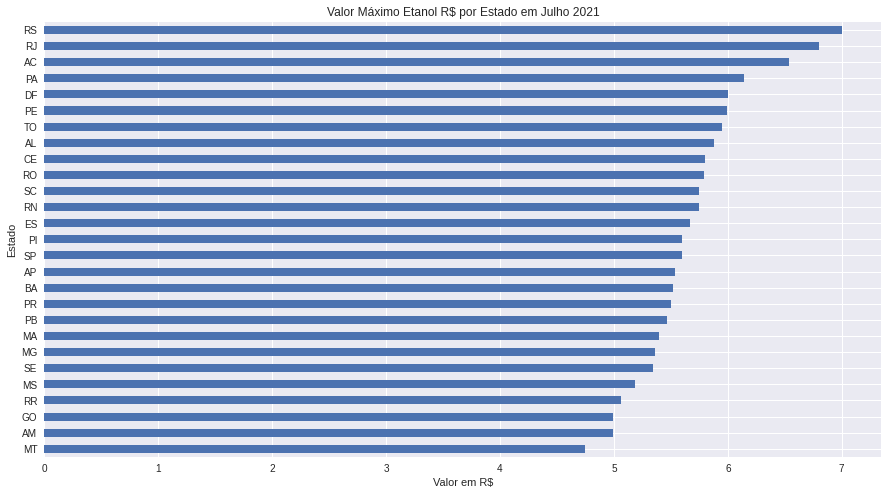

In [13]:
etanol_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].max().sort_values(ascending=True).plot.barh(title="Valor Máximo Etanol R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");

In [14]:
# Valor Mínimo Etanol em Julho 2021 Brasil
etanol_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].min().sort_values(ascending=True)

Estado - Sigla
SP                   3.19
MT                   3.67
MG                   3.85
PR                   3.95
GO                   3.98
BA                   4.00
MS                   4.18
SC                   4.19
RJ                   4.20
RN                   4.29
CE                   4.35
AM                   4.39
PE                   4.45
DF                   4.49
ES                   4.49
RS                   4.54
MA                   4.60
TO                   4.69
PB                   4.70
RR                   4.75
RO                   4.79
AL                   4.80
PI                   4.85
SE                   4.88
PA                   4.96
AC                   5.17
AP                   5.38
Name: Valor de Venda, dtype: float64

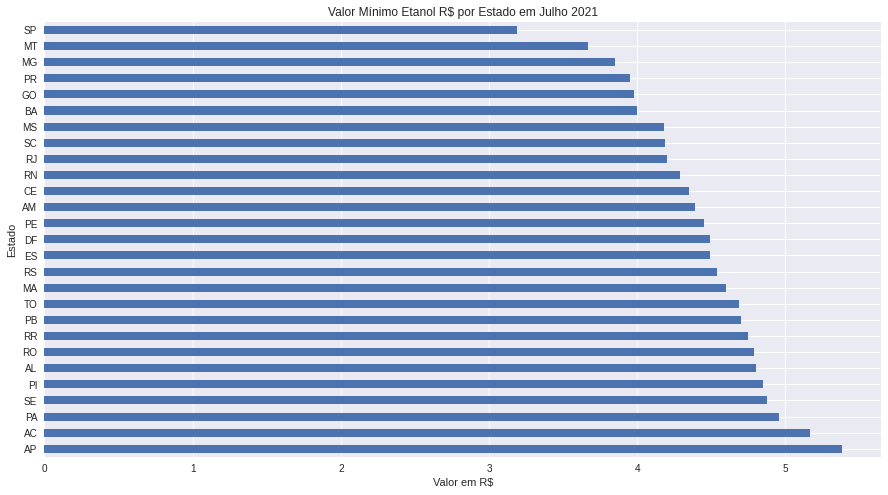

In [15]:
etanol_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].min().sort_values(ascending=False).plot.barh(title="Valor Mínimo Etanol R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");

In [16]:
# Estado com a Média mais alta preço do Etanol Julho 2021
etanol_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].mean().sort_values(ascending=False)

Estado - Sigla
RS                   5.83
AC                   5.55
RN                   5.53
AP                   5.46
PA                   5.40
RJ                   5.28
AL                   5.26
CE                   5.24
RO                   5.20
SE                   5.16
ES                   5.14
PE                   5.14
PI                   5.12
TO                   5.11
SC                   5.03
MA                   5.00
BA                   4.98
RR                   4.95
DF                   4.94
PB                   4.94
AM                   4.59
MS                   4.57
GO                   4.48
MG                   4.41
PR                   4.35
MT                   4.12
SP                   4.11
Name: Valor de Venda, dtype: float64

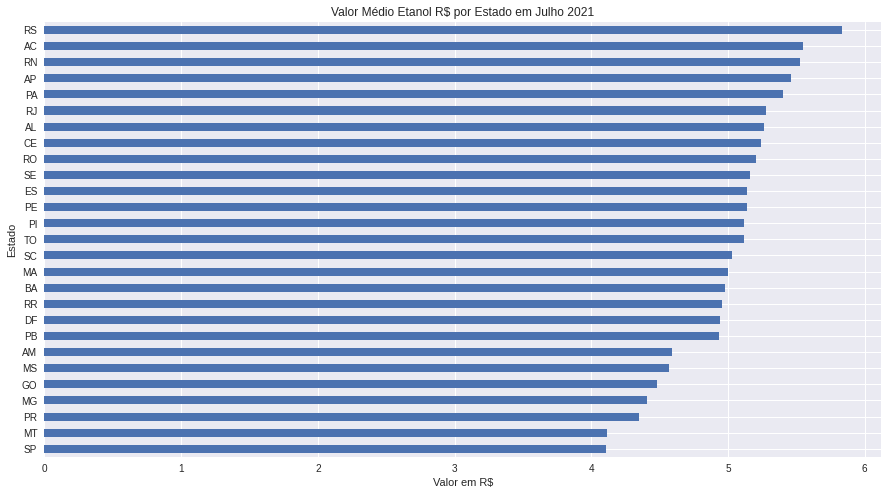

In [17]:
etanol_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].mean().sort_values(ascending=True).plot.barh(title="Valor Médio Etanol R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");



---



# Análise do preço da Gasolina Comum Brasil Julho 2021
Abaixo valores e gráfico de Preço máximo, mínimo e média encontrados em Julho de 2021 no Brasil.

In [18]:
# Valor Máximo Gasolina em Julho 2021 Brasil
gasolina_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].max().sort_values(ascending=False)

Estado - Sigla
RS                   7.00
AC                   6.99
RJ                   6.96
ES                   6.91
PA                   6.66
GO                   6.65
MG                   6.60
AL                   6.60
MT                   6.54
RN                   6.50
PI                   6.50
SP                   6.50
BA                   6.49
PE                   6.43
PR                   6.35
CE                   6.35
RO                   6.34
MS                   6.33
DF                   6.30
TO                   6.23
AM                   6.05
MA                   6.00
SE                   5.99
SC                   5.98
PB                   5.93
RR                   5.65
AP                   5.28
Name: Valor de Venda, dtype: float64

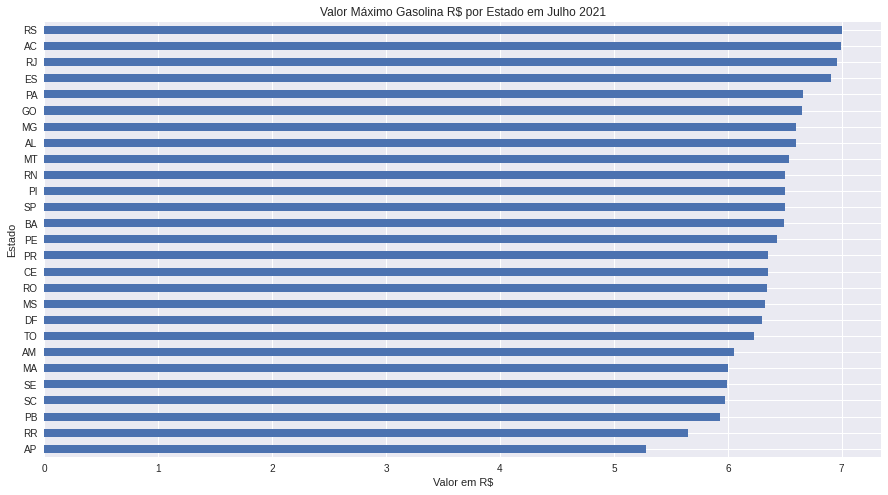

In [19]:
gasolina_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].max().sort_values(ascending=True).plot.barh(title="Valor Máximo Gasolina R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");

In [20]:
# Valor Mínimo Gasolina em Julho 2021 Brasil
gasolina_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].min().sort_values(ascending=True)

Estado - Sigla
SP                   4.55
AP                   4.87
BA                   4.99
PR                   5.05
PI                   5.09
SC                   5.12
RS                   5.20
PA                   5.33
RR                   5.34
MA                   5.37
CE                   5.37
PB                   5.38
RO                   5.38
MT                   5.40
TO                   5.45
GO                   5.47
PE                   5.48
DF                   5.50
MS                   5.50
SE                   5.55
AM                   5.57
AL                   5.60
MG                   5.66
ES                   5.68
RJ                   5.75
RN                   5.99
AC                   6.09
Name: Valor de Venda, dtype: float64

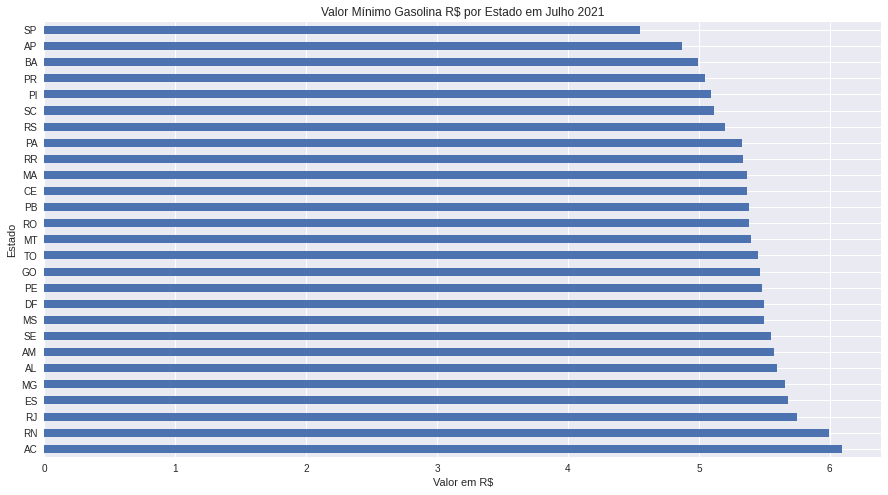

In [21]:
gasolina_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].min().sort_values(ascending=False).plot.barh(title="Valor Mínimo Gasolina R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");

In [22]:
# Estado com a Média mais alta preço da Gasolina Julho 2021
gasolina_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].mean().sort_values(ascending=False)

Estado - Sigla
AC                   6.46
RJ                   6.35
RN                   6.30
PI                   6.22
GO                   6.12
RS                   6.08
MG                   6.07
AL                   6.05
PA                   6.01
BA                   6.01
DF                   5.99
TO                   5.97
ES                   5.96
RO                   5.95
MT                   5.93
PE                   5.89
MS                   5.88
CE                   5.85
SE                   5.81
AM                   5.79
MA                   5.68
PR                   5.58
PB                   5.56
SC                   5.53
SP                   5.50
RR                   5.47
AP                   5.03
Name: Valor de Venda, dtype: float64

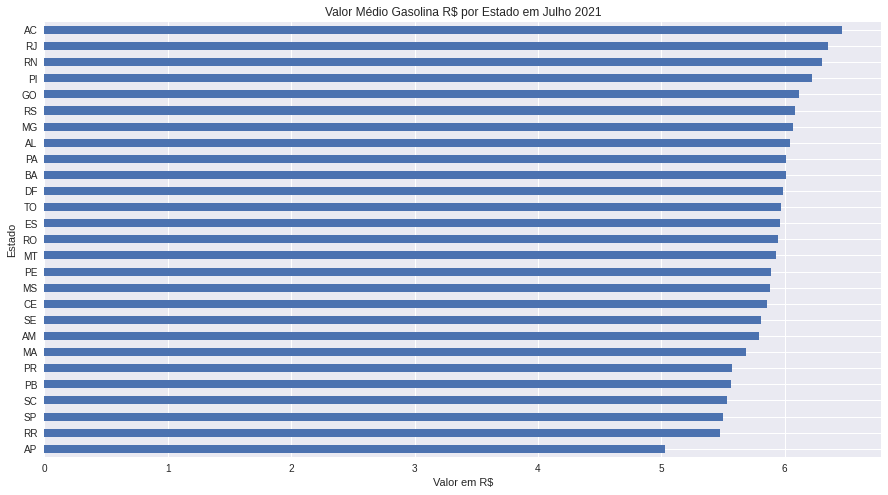

In [23]:
gasolina_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].mean().sort_values(ascending=True).plot.barh(title="Valor Médio Gasolina R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");



---



# Análise do preço da Gasolina Aditivada Brasil Julho 2021
Abaixo valores e gráfico de Preço máximo, mínimo e média encontrados em Julho de 2021 no Brasil.

In [24]:
# Valor Máximo Gasolina Aditivada em Julho 2021 Brasil
gasolina_ad_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].max().sort_values(ascending=False)

Estado - Sigla
RS                   7.10
RJ                   7.00
SP                   7.00
AC                   6.98
PI                   6.90
PA                   6.88
MG                   6.80
AL                   6.80
GO                   6.75
ES                   6.73
RN                   6.71
BA                   6.70
PR                   6.69
SC                   6.69
DF                   6.68
PE                   6.60
CE                   6.49
MT                   6.43
RO                   6.41
MS                   6.41
TO                   6.33
SE                   6.29
MA                   6.20
AM                   6.10
PB                   6.08
RR                   5.84
AP                   5.45
Name: Valor de Venda, dtype: float64

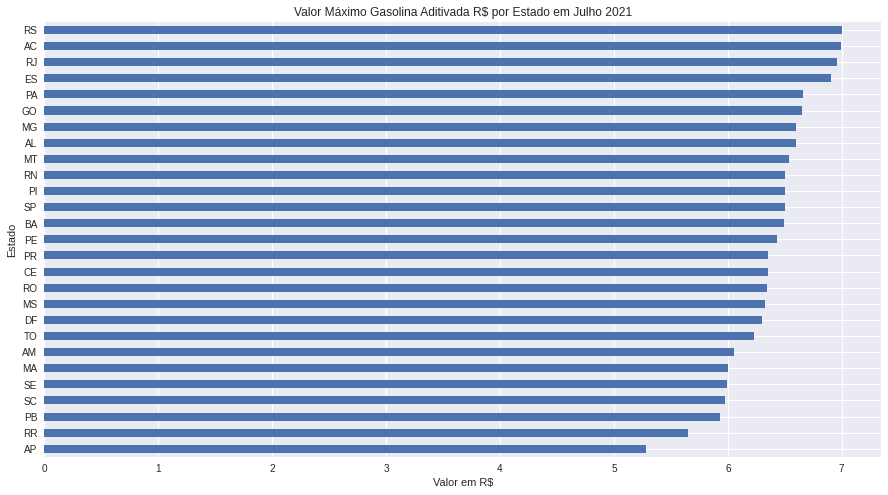

In [25]:
gasolina_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].max().sort_values(ascending=True).plot.barh(title="Valor Máximo Gasolina Aditivada R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");

In [26]:
# Valor Mínimo Gasolina Aditivada em Julho 2021 Brasil
gasolina_ad_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].min().sort_values(ascending=True)

Estado - Sigla
AM                   4.69
SP                   4.86
PA                   4.95
SC                   5.14
AP                   5.18
PR                   5.20
MA                   5.37
RR                   5.39
PB                   5.40
CE                   5.44
RJ                   5.49
PE                   5.50
RO                   5.50
MT                   5.55
MS                   5.56
DF                   5.56
BA                   5.61
SE                   5.63
RS                   5.65
ES                   5.68
TO                   5.70
AL                   5.70
MG                   5.75
GO                   5.76
PI                   6.00
RN                   6.00
AC                   6.24
Name: Valor de Venda, dtype: float64

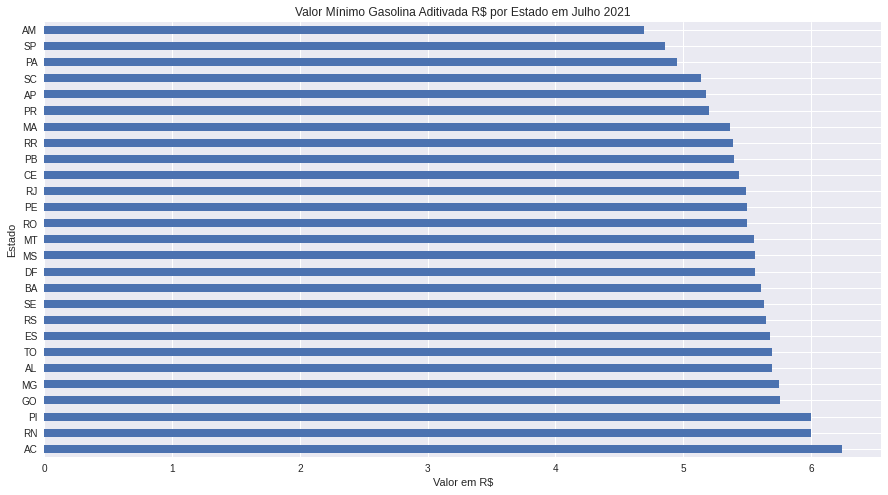

In [27]:
gasolina_ad_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].min().sort_values(ascending=False).plot.barh(title="Valor Mínimo Gasolina Aditivada R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");

In [28]:
# Estado com a Média mais alta preço da Gasolina Aditivada Julho 2021
gasolina_ad_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].mean().sort_values(ascending=False)

Estado - Sigla
RJ                   6.47
AC                   6.43
PI                   6.43
RN                   6.35
RS                   6.20
MG                   6.19
GO                   6.19
AL                   6.16
PA                   6.14
BA                   6.10
DF                   6.07
TO                   6.07
ES                   6.07
MT                   6.05
PE                   6.04
RO                   6.03
MS                   6.00
CE                   5.99
SE                   5.92
MA                   5.82
AM                   5.81
PB                   5.72
PR                   5.71
SP                   5.67
SC                   5.62
RR                   5.59
AP                   5.35
Name: Valor de Venda, dtype: float64

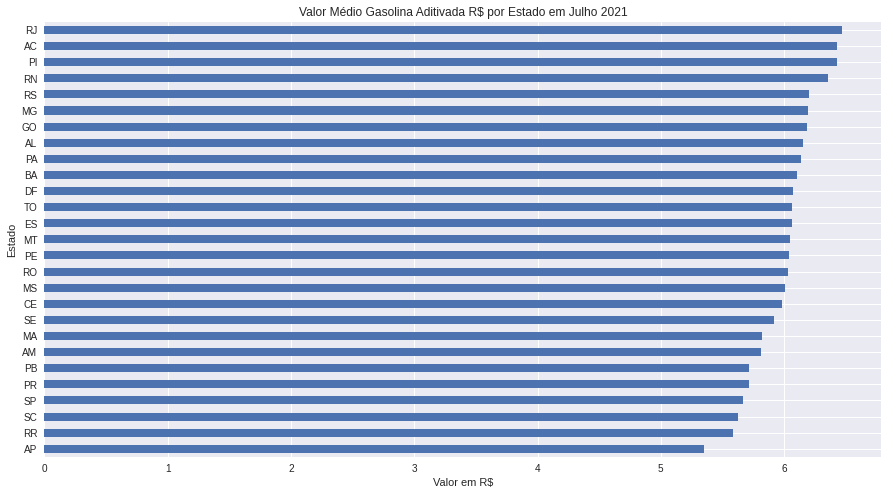

In [29]:
gasolina_ad_Brasil.groupby(['Estado - Sigla'])["Valor de Venda"].mean().sort_values(ascending=True).plot.barh(title="Valor Médio Gasolina Aditivada R$ por Estado em Julho 2021", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Estado");

# Analisando apenas o estado de Goiás

Será analisado como uma amostra do dataframe os valores registrados no Estado de Goiás.

In [30]:
# Análise do combustíveis para o Estado de Goiás, criando o Filtro por Estado e gerando um novo Dataframe

filtro_go = df['Estado - Sigla'] == 'GO'
filtro_etanol = df['Produto'] == 'ETANOL'
filtro_gasolina = df['Produto'] == 'GASOLINA'
filtro_gasolina_ad = df['Produto'] == 'GASOLINA ADITIVADA'
df_go_etanol = df.loc[filtro_go & filtro_etanol]
df_go_gasolina = df.loc[filtro_go & filtro_gasolina]
df_go_gasolina_ad = df.loc[filtro_go & filtro_gasolina_ad]

A média dos combustíveis para o estado de Goiás é maior que a média Nacional.


```
#BRASIL
Produto
GASOLINA ADITIVADA                   5.94
GASOLINA                             5.80
ETANOL                               4.59
```


In [31]:
# Imprimindo a média de preço para o Estado de Goiás
print('A média do preço do Etanol para o estado de Goiás em Julho foi de R$',df_go_etanol['Valor de Venda'].mean())
print('A média do preço da Gasolina para o estado de Goiás em Julho foi de R$',df_go_gasolina['Valor de Venda'].mean())
print('A média do preço da Gasolina para o estado de Goiás em Julho foi de R$',df_go_gasolina_ad['Valor de Venda'].mean())

A média do preço do Etanol para o estado de Goiás em Julho foi de R$ 4.4801374045801525
A média do preço da Gasolina para o estado de Goiás em Julho foi de R$ 6.116897482014374
A média do preço da Gasolina para o estado de Goiás em Julho foi de R$ 6.189860902255642


In [32]:
# Maior valor registrado para Etanol no Estado Julho 2021
df_go_etanol.groupby("Município")["Valor de Venda"].max().sort_values(ascending=False)

Município
MORRINHOS                               4.99
PORANGATU                               4.89
JATAI                                   4.89
FORMOSA                                 4.86
MINEIROS                                4.77
CALDAS NOVAS                            4.70
GOIANIA                                 4.69
APARECIDA DE GOIANIA                    4.67
TRINDADE                                4.60
ANAPOLIS                                4.60
AGUAS LINDAS DE GOIAS                   4.60
RIO VERDE                               4.59
LUZIANIA                                4.50
CATALAO                                 4.50
ITUMBIARA                               4.49
VALPARAISO DE GOIAS                     4.26
Name: Valor de Venda, dtype: float64

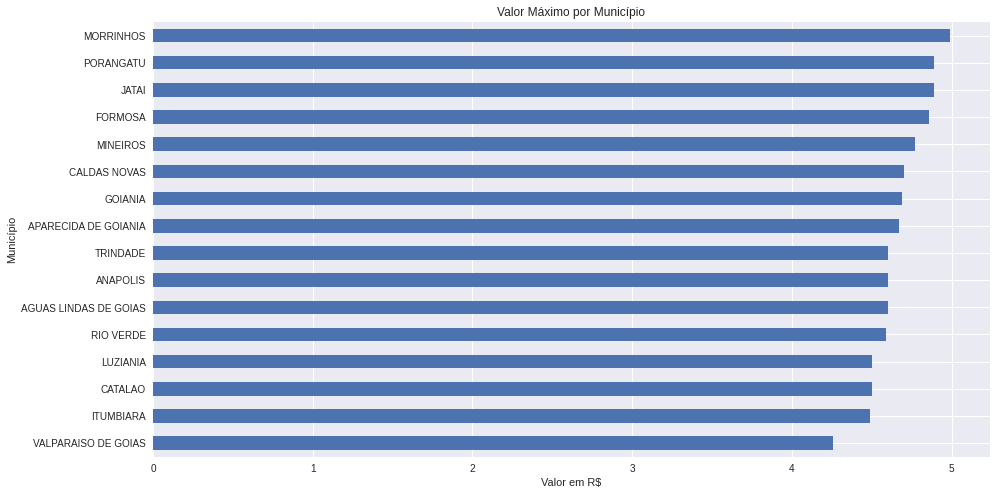

In [33]:
df_go_etanol.groupby("Município")["Valor de Venda"].max().sort_values(ascending=True).plot.barh(title="Valor Máximo por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

In [34]:
# Menor valor registrado para Etanol no Estado Julho 2021
df_go_etanol.groupby("Município")["Valor de Venda"].min().sort_values(ascending=True)

Município
TRINDADE                                3.98
APARECIDA DE GOIANIA                    3.99
ANAPOLIS                                4.00
GOIANIA                                 4.05
JATAI                                   4.16
RIO VERDE                               4.19
LUZIANIA                                4.20
CATALAO                                 4.26
VALPARAISO DE GOIAS                     4.26
CALDAS NOVAS                            4.27
ITUMBIARA                               4.34
AGUAS LINDAS DE GOIAS                   4.40
FORMOSA                                 4.47
MORRINHOS                               4.49
PORANGATU                               4.67
MINEIROS                                4.73
Name: Valor de Venda, dtype: float64

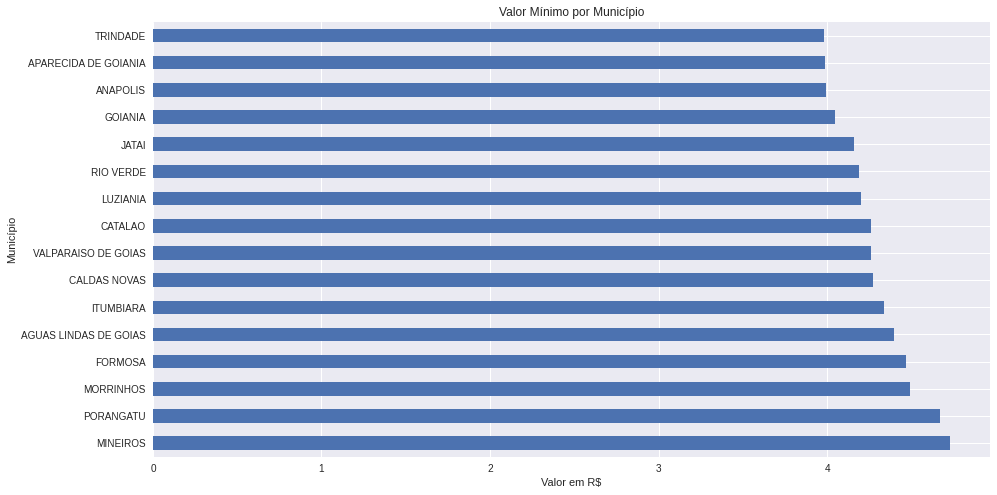

In [35]:
df_go_etanol.groupby("Município")["Valor de Venda"].min().sort_values(ascending=False).plot.barh(title="Valor Mínimo por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

In [36]:
# Média valor registrado para Etanol por Município Julho 2021
df_go_etanol.groupby("Município")["Valor de Venda"].mean().sort_values(ascending=False)

Município
MINEIROS                                4.75
PORANGATU                               4.72
FORMOSA                                 4.67
JATAI                                   4.59
MORRINHOS                               4.54
AGUAS LINDAS DE GOIAS                   4.51
GOIANIA                                 4.50
CALDAS NOVAS                            4.49
APARECIDA DE GOIANIA                    4.48
CATALAO                                 4.40
TRINDADE                                4.38
ITUMBIARA                               4.37
ANAPOLIS                                4.33
LUZIANIA                                4.33
RIO VERDE                               4.33
VALPARAISO DE GOIAS                     4.26
Name: Valor de Venda, dtype: float64

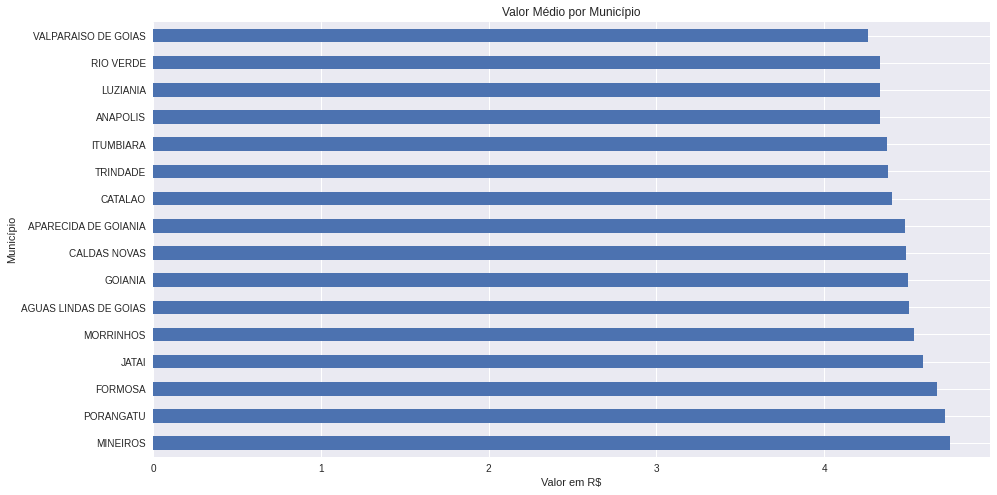

In [37]:
df_go_etanol.groupby("Município")["Valor de Venda"].mean().sort_values(ascending=False).plot.barh(title="Valor Médio por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

In [38]:
# Maior valor registrado para Gasolina no Estado
df_go_gasolina.groupby("Município")["Valor de Venda"].max().sort_values(ascending=False)

Município
JATAI                                   6.65
GOIANIA                                 6.50
TRINDADE                                6.40
APARECIDA DE GOIANIA                    6.37
FORMOSA                                 6.30
CALDAS NOVAS                            6.30
ANAPOLIS                                6.30
RIO VERDE                               6.29
MINEIROS                                6.29
MORRINHOS                               6.20
AGUAS LINDAS DE GOIAS                   6.20
CATALAO                                 6.10
LUZIANIA                                6.10
PORANGATU                               6.09
ITUMBIARA                               6.00
VALPARAISO DE GOIAS                     5.86
Name: Valor de Venda, dtype: float64

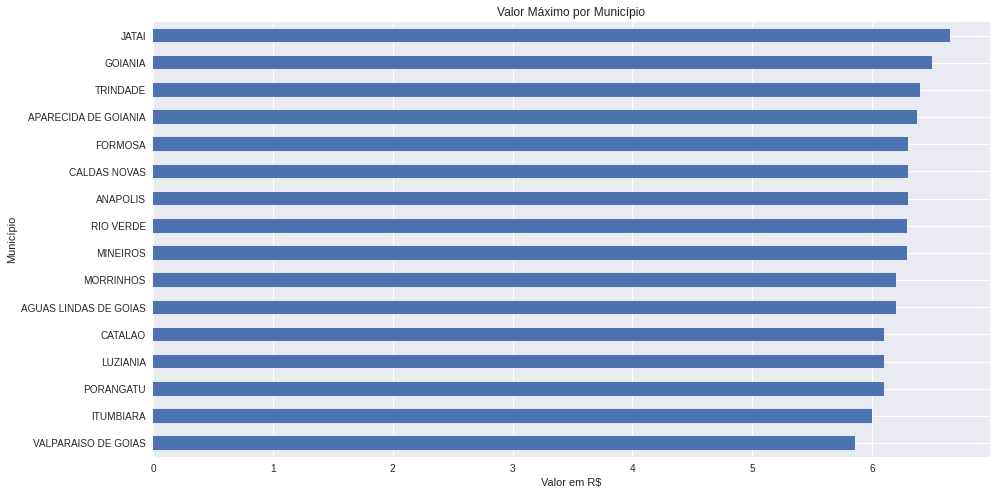

In [39]:
df_go_gasolina.groupby("Município")["Valor de Venda"].max().sort_values(ascending=True).plot.barh(title="Valor Máximo por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

In [40]:
# Menor valor registrado para Gasolina no Estado Julho 2021
df_go_gasolina.groupby("Município")["Valor de Venda"].min().sort_values(ascending=True)

Município
CALDAS NOVAS                            5.47
TRINDADE                                5.65
APARECIDA DE GOIANIA                    5.69
GOIANIA                                 5.69
LUZIANIA                                5.79
CATALAO                                 5.80
ANAPOLIS                                5.82
VALPARAISO DE GOIAS                     5.86
RIO VERDE                               5.89
ITUMBIARA                               5.94
FORMOSA                                 5.96
AGUAS LINDAS DE GOIAS                   5.99
PORANGATU                               6.02
JATAI                                   6.04
MORRINHOS                               6.14
MINEIROS                                6.16
Name: Valor de Venda, dtype: float64

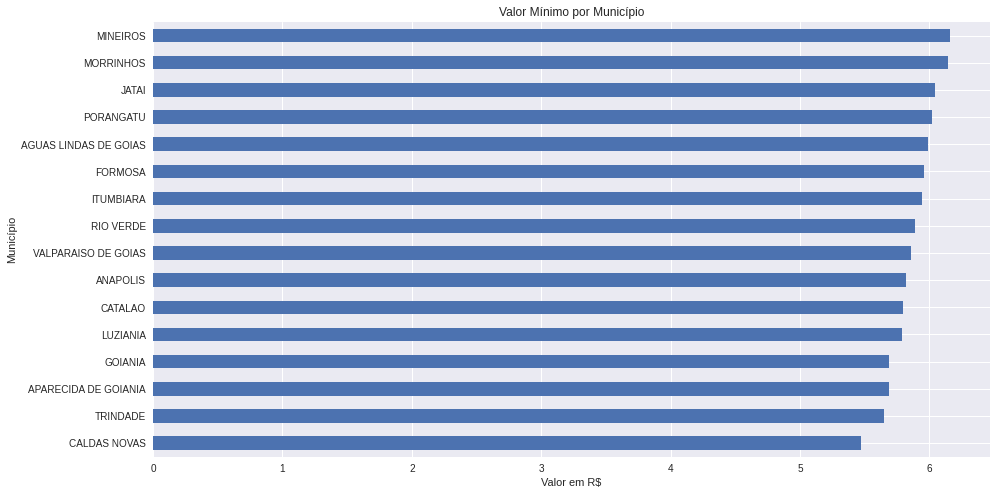

In [41]:
df_go_gasolina.groupby("Município")["Valor de Venda"].min().sort_values(ascending=True).plot.barh(title="Valor Mínimo por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

In [42]:
# Média valor registrado para Gasolina por Município Julho 2021
df_go_gasolina.groupby("Município")["Valor de Venda"].mean().sort_values(ascending=False)

Município
GOIANIA                                 6.20
JATAI                                   6.20
MINEIROS                                6.19
APARECIDA DE GOIANIA                    6.18
MORRINHOS                               6.16
TRINDADE                                6.15
FORMOSA                                 6.13
AGUAS LINDAS DE GOIAS                   6.11
ANAPOLIS                                6.10
CALDAS NOVAS                            6.10
RIO VERDE                               6.09
PORANGATU                               6.06
ITUMBIARA                               5.96
CATALAO                                 5.95
LUZIANIA                                5.94
VALPARAISO DE GOIAS                     5.86
Name: Valor de Venda, dtype: float64

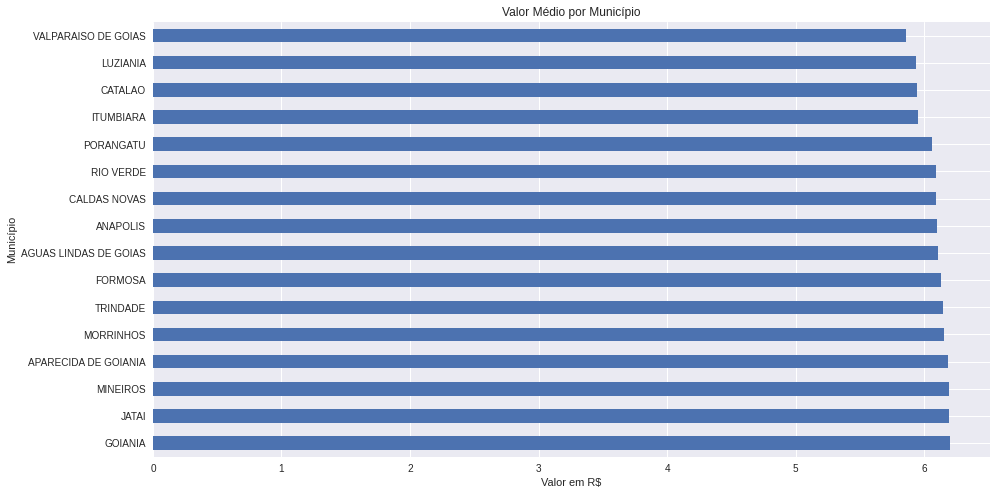

In [43]:
df_go_gasolina.groupby("Município")["Valor de Venda"].mean().sort_values(ascending=False).plot.barh(title="Valor Médio por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

In [44]:
# Maior valor registrado para Gasolina Aditivada no Estado
df_go_gasolina_ad.groupby("Município")["Valor de Venda"].max().sort_values(ascending=False)

Município
JATAI                                   6.75
GOIANIA                                 6.72
APARECIDA DE GOIANIA                    6.64
FORMOSA                                 6.40
MINEIROS                                6.34
CALDAS NOVAS                            6.30
AGUAS LINDAS DE GOIAS                   6.30
ANAPOLIS                                6.29
MORRINHOS                               6.20
LUZIANIA                                6.20
PORANGATU                               6.19
CATALAO                                 6.10
RIO VERDE                               6.09
ITUMBIARA                               5.99
VALPARAISO DE GOIAS                     5.97
Name: Valor de Venda, dtype: float64

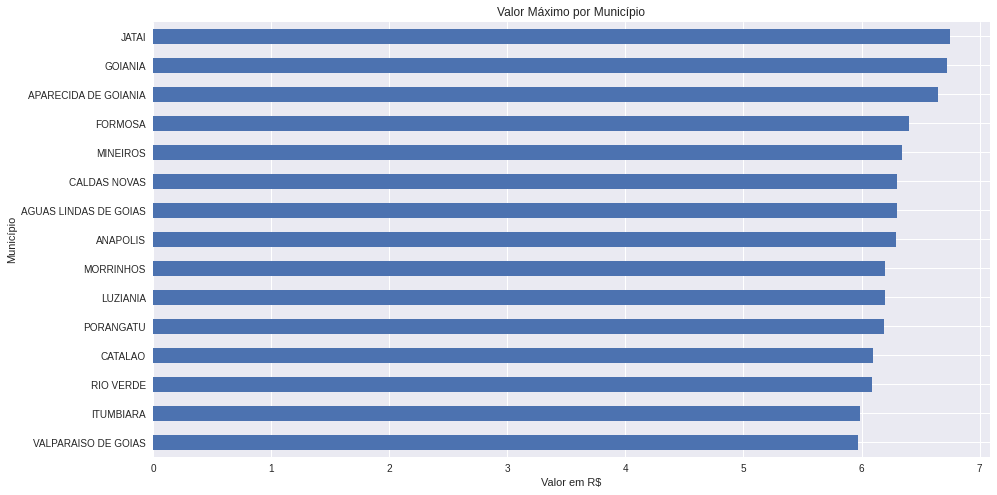

In [45]:
df_go_gasolina_ad.groupby("Município")["Valor de Venda"].max().sort_values(ascending=True).plot.barh(title="Valor Máximo por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

In [46]:
# Menor valor registrado para Gasolina Aditivada no Estado Julho 2021
df_go_gasolina_ad.groupby("Município")["Valor de Venda"].min().sort_values(ascending=True)

Município
GOIANIA                                 5.76
APARECIDA DE GOIANIA                    5.81
CATALAO                                 5.84
LUZIANIA                                5.86
CALDAS NOVAS                            5.88
ITUMBIARA                               5.94
VALPARAISO DE GOIAS                     5.96
FORMOSA                                 5.98
AGUAS LINDAS DE GOIAS                   5.99
ANAPOLIS                                6.00
PORANGATU                               6.02
JATAI                                   6.04
RIO VERDE                               6.09
MORRINHOS                               6.15
MINEIROS                                6.24
Name: Valor de Venda, dtype: float64

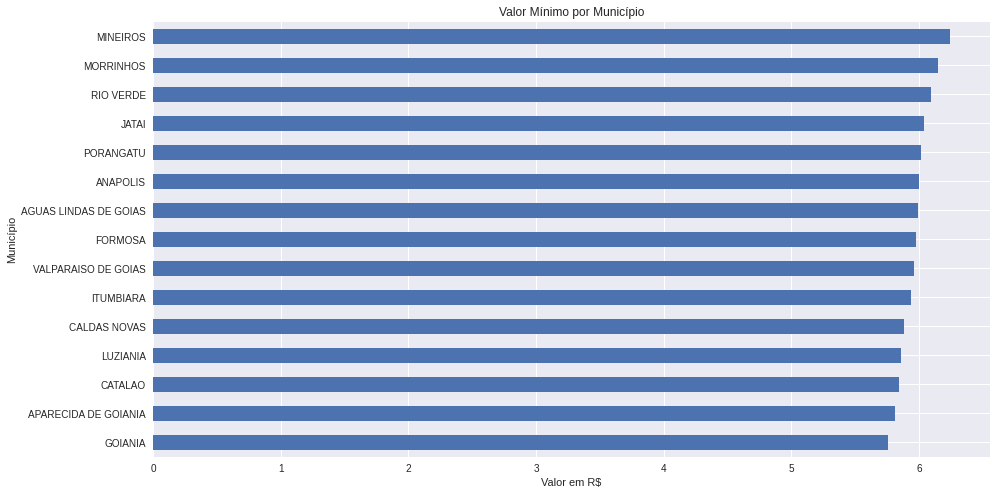

In [47]:
df_go_gasolina_ad.groupby("Município")["Valor de Venda"].min().sort_values(ascending=True).plot.barh(title="Valor Mínimo por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

In [48]:
# Média valor registrado para Gasolina Aditivada por Município Julho 2021
df_go_gasolina_ad.groupby("Município")["Valor de Venda"].mean().sort_values(ascending=False)

Município
APARECIDA DE GOIANIA                    6.33
MINEIROS                                6.31
GOIANIA                                 6.29
JATAI                                   6.25
FORMOSA                                 6.20
ANAPOLIS                                6.17
MORRINHOS                               6.17
AGUAS LINDAS DE GOIAS                   6.13
PORANGATU                               6.10
CALDAS NOVAS                            6.10
RIO VERDE                               6.09
LUZIANIA                                6.01
CATALAO                                 5.98
VALPARAISO DE GOIAS                     5.96
ITUMBIARA                               5.96
Name: Valor de Venda, dtype: float64

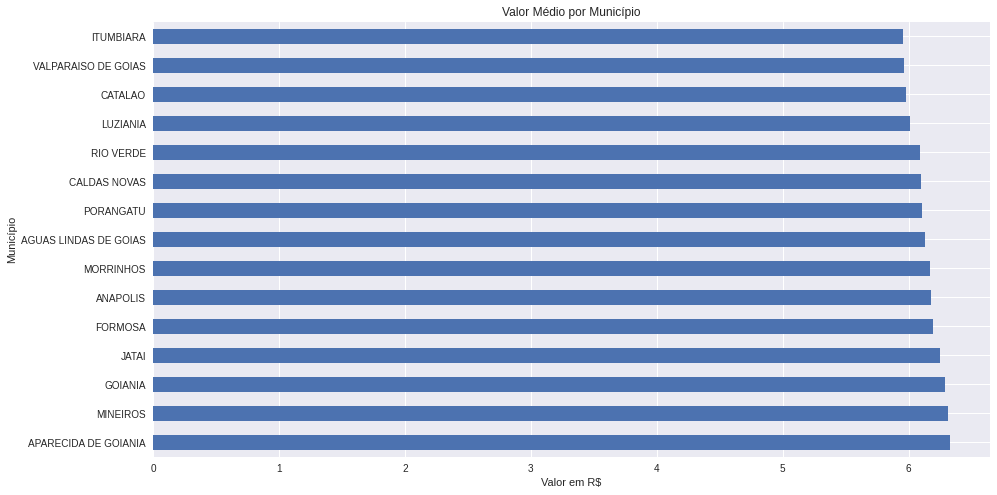

In [49]:
df_go_gasolina_ad.groupby("Município")["Valor de Venda"].mean().sort_values(ascending=False).plot.barh(title="Valor Médio por Município", figsize=(15, 8))
plt.xlabel("Valor em R$")
plt.ylabel("Município");

# Gráfico de Linha do Preço Máximo e Mínimo
Apartir destes gráficos é possível identificar quais datas houve aumento ou redução do preço dentro do mês, para o estado de Goiás


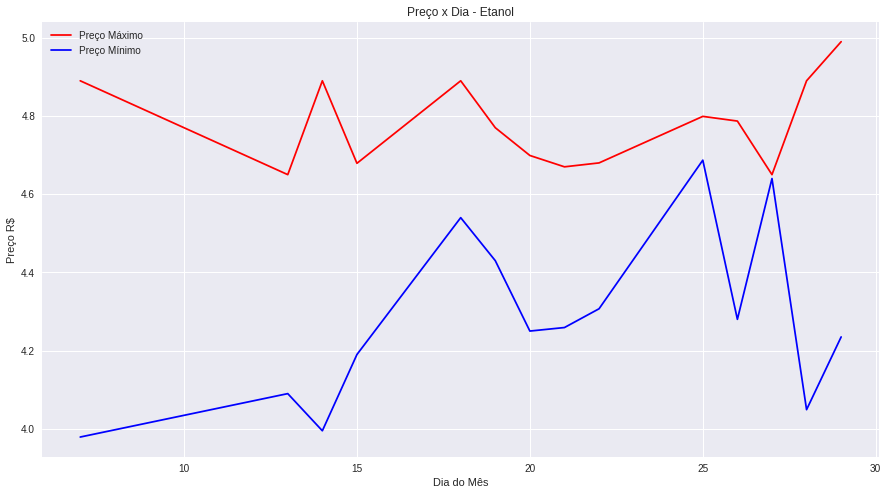

In [50]:
# Gráfico Evolução do Preço máximo x por dia do mês Etanol
df_go_etanol.groupby(df_go_etanol["Data da Coleta"].dt.day)["Valor de Venda"].max().plot(title="Preço x Dia - Etanol", label="Preço Máximo", color='red', figsize=(15, 8))
df_go_etanol.groupby(df_go_etanol["Data da Coleta"].dt.day)["Valor de Venda"].min().plot(label="Preço Mínimo", color='blue')
plt.legend()
plt.xlabel("Dia do Mês")
plt.ylabel("Preço R$");

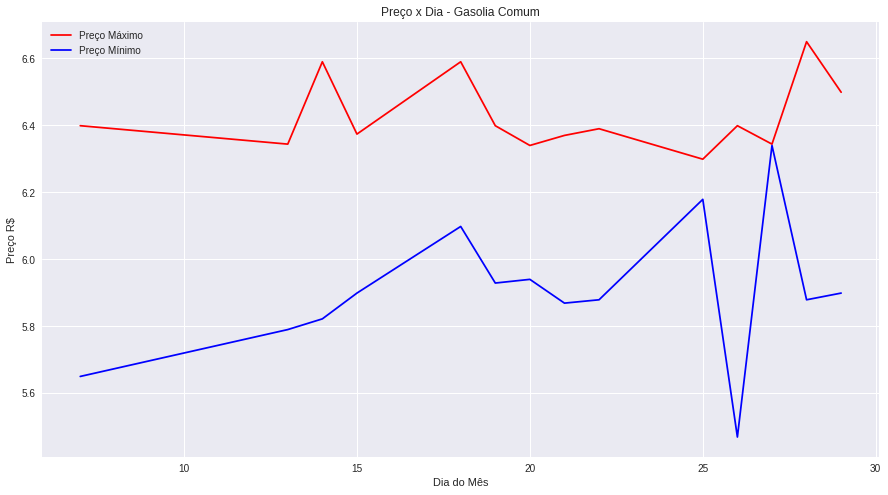

In [51]:
# Gráfico Evolução do Preço máximo x por dia do mês Gasolina Comum
df_go_gasolina.groupby(df_go_gasolina["Data da Coleta"].dt.day)["Valor de Venda"].max().plot(title="Preço x Dia - Gasolia Comum", label="Preço Máximo", color='red', figsize=(15, 8))
df_go_gasolina.groupby(df_go_gasolina["Data da Coleta"].dt.day)["Valor de Venda"].min().plot(label="Preço Mínimo", color='blue')
plt.legend()
plt.xlabel("Dia do Mês")
plt.ylabel("Preço R$");

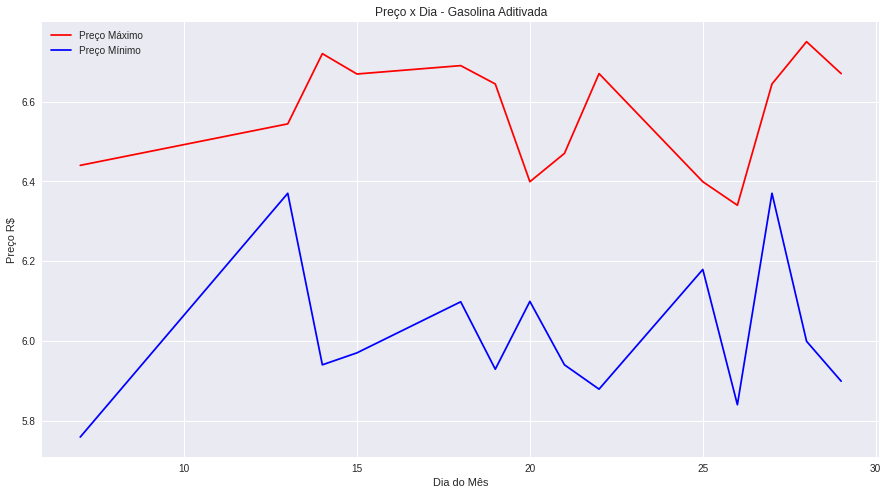

In [52]:
# Gráfico Evolução do Preço máximo x por dia do mês Gasolina Aditivada
df_go_gasolina_ad.groupby(df_go_gasolina_ad["Data da Coleta"].dt.day)["Valor de Venda"].max().plot(title="Preço x Dia - Gasolina Aditivada", label="Preço Máximo", color='red', figsize=(15, 8))
df_go_gasolina_ad.groupby(df_go_gasolina_ad["Data da Coleta"].dt.day)["Valor de Venda"].min().plot(label="Preço Mínimo", color='blue')
plt.legend()
plt.xlabel("Dia do Mês")
plt.ylabel("Preço R$");

# Conclusão
Apartir de Dados Abertos disponibilizados como este, disponibilizado pelo Governo Brasileiro em [Dados Gov BR](https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda/resource/83dbce99-1a95-4a38-ab0c-b2ed056b3ade), podemos extrair informações relevantes para estudo.
